# 朴素贝叶斯算法
输入：训练数据T={(x1,y1),(x2,y2),...,(xn,yn)},Xij是第i个样本的第j个特征,ajl是第j个特征可
能取得第l个值；实例x
输出：实例x的分类
（1）计算先验概率及条件概率
             P(Y=ck)=sum(I(yi=ck))/N
             P(Xj=ajl|Y=ck)=sum(I(xij=ajl,y=ck))/sum(I(yi=ck))
（2）对于给定的实例x=(x1,x2,...,xn)，计算
           P(Y=ck)mul(P(Xj=xj)|Y=ck)
（3）确定实例x的类
           y=argmaxP(Y=ck)mul(P(Xj=xj|Y=ck))


# 本节采用的是计算离散属性的方法，但选用的是连续数据集！！！

In [54]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def load_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    plt.scatter(df[:50]['sepal length (cm)'], df[:50]['sepal width (cm)'])
    plt.scatter(df[50:100]['sepal length (cm)'], df[50:100]['sepal width (cm)'])
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend()
    plt.show()
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return  data[:,:-1], data[:,-1]

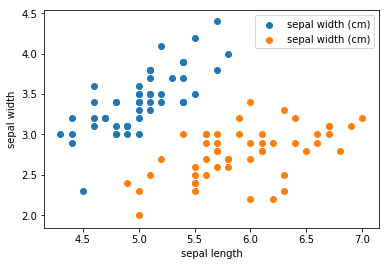

In [55]:
X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


# 应用极大似然估计的朴素贝叶斯，缺点是若测试样本有个属性值未在训练样本里出现过， 则所估计的概率值则会为0，使分类产生偏差

In [77]:
class likelihoodBayesModel:
    def __init__(self):
        self.labelCount={}
        self.trainNums=0
        self.Xtrain=None
        self.ytrain=None
    
    def fit(self,Xtrain,ytrain):
        m,n=Xtrain.shape
        self.Xtrain=Xtrain
        self.labelCount=self.CountLabels(ytrain)
        self.ytrain=np.mat(ytrain)
        self.trainNums=m
        print("fit complete!")
        
    
    def predict(self,Xtest):
        predictLabels={}
        #计算P(y=ck)
        for label in self.labelCount.keys():
            Py=int(self.labelCount[label])/self.trainNums
            index=0  #属性序号
            for attr in Xtest:   #遍历每个序号的属性
                currentLabelIndexes=np.where(self.ytrain==label)[1]
                currentLabelDatas=self.Xtrain[currentLabelIndexes]
                currentAttrArray=np.where(currentLabelDatas[:,index]==attr)[0]
                Py=Py*(len(currentAttrArray)/len(currentLabelDatas))
                index+=1
            
            predictLabels[label]=Py
        maxProbability=-math.inf
        pLabel=0
        for k,v in predictLabels.items():
            if v>maxProbability:
                maxProbability=v
                pLabel=k
        
        return pLabel   
    
    def score(self,Xtest,ytest):
        predictLabels=[]
        for x in Xtest:
            predictLabels.append(self.predict(x))
        accuracy=np.sum(predictLabels==y_test)/len(predictLabels)
        print("accuracy is : ",accuracy)
    
    
        
    def CountLabels(self,y):
        labelCount={}
        for label in y:
            if label not in labelCount.keys():
                labelCount[label]=0
            else:
                labelCount[label]+=1
        return labelCount
            

In [78]:
naiveBayes_likelihood=likelihoodBayesModel()
naiveBayes_likelihood.fit(X_train,y_train)
naiveBayes_likelihood.score(X_test,y_test)


fit complete!
accuracy is :  0.7


# 而采用贝叶斯估计的朴素贝叶斯，会为分母分子赋予一个lambda,当lambda=0时就是极大似然估计。常取lambda=1，这时称为拉普拉斯平滑

In [79]:
class BayesEstimateModel:
    def __init__(self,lambd=1):
        self.labelCount={}
        self.trainNums=0
        self.Xtrain=None
        self.ytrain=None
        self.lambd=lambd
    
    def fit(self,Xtrain,ytrain):
        m,n=Xtrain.shape
        self.Xtrain=Xtrain
        self.labelCount=self.CountLabels(ytrain)
        self.ytrain=np.mat(ytrain)
        self.trainNums=m
        print("fit complete!")
        
    
    def predict(self,Xtest):
        predictLabels={}
        K=len(self.labelCount.keys())
        #计算P(y=ck)
        for label in self.labelCount.keys():
            Py=(self.labelCount[label]+self.lambd)/(self.trainNums+K*self.lambd)
            index=0  #属性序号
            for attr in Xtest:   #遍历每个序号的属性
                Sj=len(set(self.Xtrain[:,index]))
                currentLabelIndexes=np.where(self.ytrain==label)[1]
                currentLabelDatas=self.Xtrain[currentLabelIndexes]
                currentAttrArray=np.where(currentLabelDatas[:,index]==attr)[0]
                Pc=(len(currentAttrArray)+self.lambd)/(len(currentLabelDatas)+Sj*self.lambd)
                Py=Py*Pc
                index+=1
            
            predictLabels[label]=Py
        maxProbability=-math.inf
        pLabel=0
        for k,v in predictLabels.items():
            if v>maxProbability:
                maxProbability=v
                pLabel=k
        
        return pLabel   
    
    def score(self,Xtest,ytest):
        predictLabels=[]
        for x in Xtest:
            predictLabels.append(self.predict(x))
        accuracy=np.sum(predictLabels==y_test)/len(predictLabels)
        print("accuracy is : ",accuracy)
    
    
        
    def CountLabels(self,y):
        labelCount={}
        for label in y:
            if label not in labelCount.keys():
                labelCount[label]=0
            else:
                labelCount[label]+=1
        return labelCount
            

In [80]:
naiveBayes_bayesEstimate=BayesEstimateModel()
naiveBayes_bayesEstimate.fit(X_train,y_train)
naiveBayes_bayesEstimate.score(X_test,y_test)

fit complete!
accuracy is :  0.8


# 上述模型估计条件概率P（X=xi|Y=ck）时采用的是计算离散属性的做法，即直接统计出现概率，而我们采用的数据集是连续属性，计算连续属性需考虑概率密度函数